Importando bibliotecas e dataset

In [ ]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tensorflow.keras.datasets.mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


Normalizando as imagens de treino e teste

In [ ]:
train_images = train_images/255 - 0.5
test_images = test_images/255 - 0.5

Adicionando mais uma dimensão nas imagens de treino e teste

In [ ]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Criando, compilando e treinando a Rede

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

num_filters = 8
filter_size = 3
pool_size = 2

modelo = tensorflow.keras.models.Sequential([#Conv2D(32, filter_size, input_shape=(28,28,1)),
                                             Conv2D(32, kernel_size = (5,5), strides = (1,1), activation = 'relu', input_shape = (28, 28, 1)),
                                             MaxPooling2D(pool_size=pool_size),
                                             Dropout(.3),
                                             Conv2D(16, filter_size),
                                             MaxPooling2D(pool_size=4),
                                             Flatten(),
                                             Dense(10, activation='softmax')
                                             ])

In [ ]:
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
historico = modelo.fit(train_images,
           tensorflow.keras.utils.to_categorical(train_labels),
           epochs=5,
           validation_data=(test_images, tensorflow.keras.utils.to_categorical(test_labels))
    
)

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3382 - accuracy: 0.8963 - val_loss: 0.1053 - val_accuracy: 0.9667
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1233 - accuracy: 0.9610 - val_loss: 0.0700 - val_accuracy: 0.9798
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0970 - accuracy: 0.9701 - val_loss: 0.0611 - val_accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0829 - accuracy: 0.9741 - val_loss: 0.0582 - val_accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0741 - accuracy: 0.9769 - val_loss: 0.0518 - val_accuracy: 0.9840


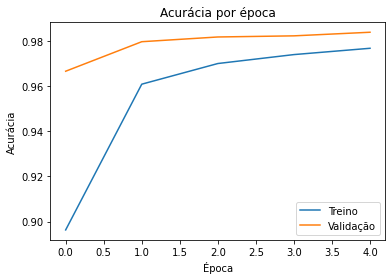

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

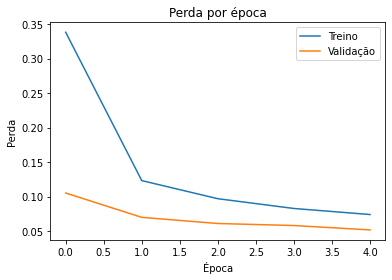

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

In [ ]:
modelo_aula = tensorflow.keras.models.Sequential([
                                             Conv2D(32, kernel_size = (5,5), strides = (1,1), activation = 'relu', input_shape = (28, 28, 1)),
                                             MaxPooling2D(pool_size = (2,2), strides = (2,2)),
                                             Conv2D(64, (5,5), activation = 'relu'),
                                             MaxPooling2D(pool_size = (2,2)),
                                             Flatten(),
                                             Dropout(0.4),
                                             Dense(1000, activation = 'relu'),
                                             Dense(10, activation = 'softmax'),
                                             ])

modelo_aula.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

historico_aula = modelo_aula.fit(train_images,
           tensorflow.keras.utils.to_categorical(train_labels),
           epochs=5,
           validation_data=(test_images, tensorflow.keras.utils.to_categorical(test_labels))
    
)

Epoch 1/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1296 - accuracy: 0.9597 - val_loss: 0.0373 - val_accuracy: 0.9885
Epoch 2/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.0259 - val_accuracy: 0.9922
Epoch 3/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0312 - val_accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0349 - accuracy: 0.9895 - val_loss: 0.0263 - val_accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.0291 - val_accuracy: 0.9912


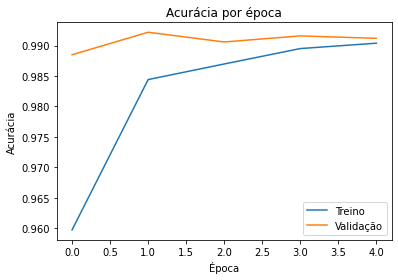

In [ ]:
plt.plot(historico_aula.history['accuracy'])
plt.plot(historico_aula.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

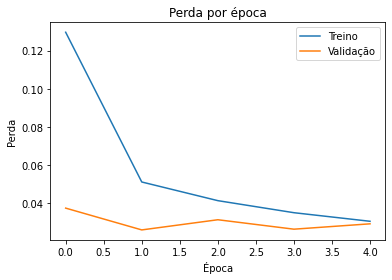

In [ ]:
plt.plot(historico_aula.history['loss'])
plt.plot(historico_aula.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

##Testando alterações para quebrar o modelo

In [ ]:
modelo_quebrado = tensorflow.keras.models.Sequential([
                                             Conv2D(4, kernel_size = (5,5), strides = (2,2), activation = 'relu', input_shape = (28, 28, 1)),
                                             MaxPooling2D(pool_size = (2,2), strides = (2,2)),
                                             Conv2D(2, (5,5), activation = 'relu'),
                                             MaxPooling2D(pool_size = (2,2)),
                                             Flatten(),
                                             Dropout(0.7),
                                             Dense(10, activation = 'relu'),
                                             Dense(10, activation = 'softmax'),
                                             ])

modelo_quebrado.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

historico_quebrado = modelo_quebrado.fit(train_images,
           tensorflow.keras.utils.to_categorical(train_labels),
           epochs=3,
           validation_data=(test_images, tensorflow.keras.utils.to_categorical(test_labels))
    
)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 2.1757 - accuracy: 0.1384 - val_loss: 1.8707 - val_accuracy: 0.3595
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 2.1275 - accuracy: 0.1622 - val_loss: 1.8458 - val_accuracy: 0.3072
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 2.1026 - accuracy: 0.1776 - val_loss: 1.7865 - val_accuracy: 0.3255


In [ ]:
 modelo_quebrado2 = tensorflow.keras.models.Sequential([
                                             Conv2D(32, kernel_size = (20,20), strides = (1,1), activation = 'exponential', input_shape = (28, 28, 1)),
                                             MaxPooling2D(pool_size=pool_size),
                                             Dropout(.3),
                                             Conv2D(16, (4,4), activation='exponential'),
                                             Flatten(),
                                             Dense(10, activation='softmax')
                                             ])

modelo_quebrado2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

historico_quebrado = modelo_quebrado2.fit(train_images,
           tensorflow.keras.utils.to_categorical(train_labels),
           epochs=5,
           validation_data=(test_images, tensorflow.keras.utils.to_categorical(test_labels))
    
)

Epoch 1/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.7938 - accuracy: 0.7689 - val_loss: 0.2967 - val_accuracy: 0.9206
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 9498.4297 - accuracy: 0.7971 - val_loss: 3.5213 - val_accuracy: 0.8216
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: nan - accuracy: 0.6608 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980


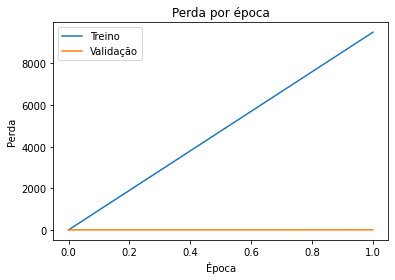

In [ ]:
plt.plot(historico_quebrado.history['loss'])
plt.plot(historico_quebrado.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

In [ ]:
print(historico_quebrado.history['loss'])
print(historico_quebrado.history['val_loss'])

[0.7937856316566467, 9498.4296875, nan, nan, nan]
[0.29672369360923767, 3.521306276321411, nan, nan, nan]
